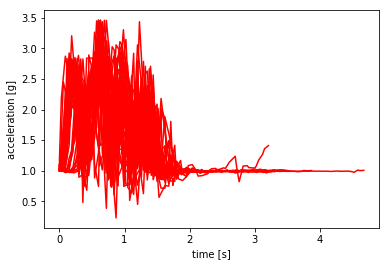

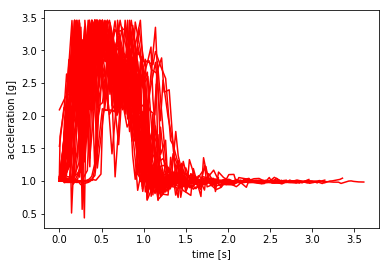

In [53]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas
#-----------Turning Kick------------------------------------
path = "csv/Right_TurningKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))

np_array_list = []
export_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')
    df=df.iloc[start:end]
    export_list.append([df['X (mg)'].mean(), df['X (mg)'].std(), df['X (mg)'].min(), df['X (mg)'].max(), "1"])
    #print(df.describe())
    #plt.show()

plt.show()
#-----------Axe Kick------------------------------------
path = "csv/Right_AxeKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))


np_array_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')
    df=df.iloc[start:end]
    export_list.append([df['X (mg)'].mean(), df['X (mg)'].std(), df['X (mg)'].min(), df['X (mg)'].max(), "2"])
    #plt.show()
    
plt.show()

with open('X (mg)_Accelerometer.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "kick_Type"])
    for row in export_list:
        writer.writerow(row)
    
#print(df.describe())
plt.show()
    
    

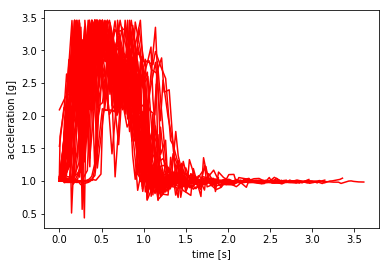